# Project 4: Drums

Project Goal: Using various drum heads, compute eigenvalue ratios both from stress/mass matrix computation, and recorded drum sounds (via fourier anaylsis). The shapes of the drums are a square, rectangle, triangle, circle, and semi-circle. Meshes were constructed for each of these shapes through Mathematica. The membranes of the drums were the only things that were meshed with the condition that the membrane is zero along the boundary.

Group Members: Trevor Kieft, Anthony Palmer, Drew Rosales, Hamed Fahandezh Sadi, and Travis Wavrunek

In [35]:
from dolfin import *
from mshr import *
from petsc4py import PETSc
from scipy.linalg.decomp import eig
from scipy.sparse import csr_matrix, coo_matrix
from scipy.io import wavfile
import scipy.fft
import scipy.signal
from scipy.io import mmwrite
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fenics as fe


## Meshes

![title](img/drums.png)

### Circle Mesh

In [5]:
"""Circle"""
circle_points = [Point(11.9851, 0.598151), Point(11.9404, 1.19481), Point(11.866, 1.78851), Point(11.7621,2.37775), 
Point(11.6289, 2.96109), Point(11.4669, 3.53706), Point(11.2763,4.10424), Point(11.0577, 4.66122), 
Point(10.8116, 5.2066), Point(10.5387,5.73905), Point(10.2395, 6.25722), Point(9.91487, 6.75984), 
Point(9.56559,7.24565), Point(9.19253, 7.71345), Point(8.79662, 8.16207), Point(8.37884,8.5904), 
Point(7.94023, 8.99737), Point(7.48188, 9.38198), Point(7.00492,9.74326), Point(6.51056, 10.0803), 
Point(6., 10.3923), Point(5.47453,10.6785), Point(4.93545, 10.9381), Point(4.38409, 11.1705), 
Point(3.82184,11.3751), Point(3.25009, 11.5515), Point(2.67025, 11.6991), Point(2.08378,11.8177), 
Point(1.49212, 11.9069), Point(0.896761, 11.9664), Point(0.299168,11.9963), Point(-0.299168, 11.9963), 
Point(-0.896761, 11.9664), Point(-1.49212,11.9069), Point(-2.08378, 11.8177), Point(-2.67025, 11.6991), 
Point(-3.25009,11.5515), Point(-3.82184, 11.3751), Point(-4.38409, 11.1705), Point(-4.93545,10.9381), 
Point(-5.47453, 10.6785), Point(-6., 10.3923), Point(-6.51056,10.0803), Point(-7.00492, 9.74326), 
Point(-7.48188, 9.38198), Point(-7.94023,8.99737), Point(-8.37884, 8.5904), Point(-8.79662, 8.16207), 
Point(-9.19253,7.71345), Point(-9.56559, 7.24565), Point(-9.91487, 6.75984), Point(-10.2395,6.25722), 
Point(-10.5387, 5.73905), Point(-10.8116, 5.2066), Point(-11.0577,4.66122), Point(-11.2763, 4.10424), 
Point(-11.4669, 3.53706), Point(-11.6289,2.96109), Point(-11.7621, 2.37775), Point(-11.866, 1.78851), 
Point(-11.9404,1.19481), Point(-11.9851, 0.598151), Point(-12.,0.), Point(-11.9851, -0.598151), 
Point(-11.9404, -1.19481), Point(-11.866, -1.78851), Point(-11.7621, -2.37775), 
Point(-11.6289, -2.96109), Point(-11.4669, -3.53706), Point(-11.2763, -4.10424), Point(-11.0577, -4.66122), 
Point(-10.8116, -5.2066), Point(-10.5387, -5.73905), Point(-10.2395, -6.25722), Point(-9.91487, -6.75984), 
Point(-9.56559, -7.24565), Point(-9.19253, -7.71345), Point(-8.79662, -8.16207), Point(-8.37884, -8.5904), 
Point(-7.94023, -8.99737), Point(-7.48188, -9.38198), Point(-7.00492, -9.74326), Point(-6.51056, -10.0803), 
Point(-6., -10.3923), Point(-5.47453, -10.6785), Point(-4.93545, -10.9381), Point(-4.38409, -11.1705), 
Point(-3.82184, -11.3751), Point(-3.25009, -11.5515), Point(-2.67025, -11.6991), Point(-2.08378, -11.8177), 
Point(-1.49212, -11.9069), Point(-0.896761, -11.9664), Point(-0.299168, -11.9963), Point(0.299168, -11.9963), 
Point(0.896761, -11.9664), Point(1.49212, -11.9069), Point(2.08378, -11.8177), Point(2.67025, -11.6991), Point(3.25009, -11.5515), 
Point(3.82184, -11.3751), Point(4.38409, -11.1705), Point(4.93545, -10.9381), Point(5.47453, -10.6785), 
Point(6., -10.3923), Point(6.51056, -10.0803), Point(7.00492, -9.74326), Point(7.48188, -9.38198), 
Point(7.94023, -8.99737), Point(8.37884, -8.5904), Point(8.79662, -8.16207), 
Point(9.19253, -7.71345), Point(9.56559, -7.24565), Point(9.91487, -6.75984), 
Point(10.2395, -6.25722), Point(10.5387, -5.73905), Point(10.8116, -5.2066), 
Point(11.0577, -4.66122), Point(11.2763, -4.10424), Point(11.4669, -3.53706), 
Point(11.6289, -2.96109), Point(11.7621, -2.37775), Point(11.866, -1.78851), 
Point(11.9404, -1.19481), Point(11.9851, -0.598151), Point(12., 0.)]

### Square

In [6]:
"""Square"""
square_points = [Point(12., 10.),
Point(11.732050807568877, 11.),
Point(11., 11.732050807568877),
Point(10., 12.),
Point(-10., 12.),
Point(-11., 11.732050807568877),
Point(-11.732050807568877, 11.),
Point(-12., 10.),
Point(-12., -10.),
Point(-11.732050807568877, -11.),
Point(-11., -11.732050807568877),
Point(-10., -12.),
Point(10., -12.),
Point(11., -11.732050807568877),
Point(11.732050807568877, -11.),
Point(12., -10.)]

### Rectangle

In [7]:
"""Rectangle"""
rectangle_points = [Point(12., 6.),
Point(11.931851652578136, 6.5176380902050415),
Point(11.732050807568877, 7.),
Point(11.414213562373096, 7.414213562373095),
Point(11., 7.732050807568877),
Point(10.517638090205041, 7.931851652578136),
Point(10., 8.),
Point(-10., 8.),
Point(-10.517638090205041, 7.931851652578136),
Point(-11., 7.732050807568877),
Point(-11.414213562373096, 7.414213562373095),
Point(-11.732050807568877, 7.),
Point(-11.931851652578136, 6.5176380902050415),
Point(-12., 6.),
Point(-12., -6.),
Point(-11.931851652578136, -6.5176380902050415),
Point(-11.732050807568877, -7.),
Point(-11.414213562373096, -7.414213562373095),
Point(-11., -7.732050807568877),
Point(-10.517638090205041, -7.931851652578136),
Point(-10., -8.),
Point(10., -8.),
Point(10.517638090205041, -7.931851652578136),
Point(11., -7.732050807568877),
Point(11.414213562373096, -7.414213562373095),
Point(11.732050807568877, -7.),
Point(11.931851652578136, -6.5176380902050415),
Point(12., -6.)]

### Triangle

In [8]:
"""Triangle"""
triangle_points = [Point(1.3408171183666293, 0.4942643790396055),
Point(1.372659824525042, 0.5284684106428211),
Point(1.39880431175113, 0.5672026267971428),
Point(1.4186161771737433, 0.6095271315418065),
Point(1.431614680658327, 0.654414909617426),
Point(1.437484410092952, 0.7007767472618626),
Point(1.4360829349463178, 0.7474876622691514),
Point(1.4274442623821209, 0.7934142019791426),
Point(1.4117780120662693, 0.8374419468049439),
Point(1.3894643296904556, 0.8785025519178269),
Point(1.3610446626367896, 0.9155996709159858),
Point(1.3272086216144063, 0.9478331324324969),
Point(1.2887772470739116, 0.9744207830307163),
Point(1.246683086444516, 0.9947174663635037),
Point(1.2019475656249572, 1.0082306780619725),
Point(1.1556562038149392, 1.0146325164837675),
Point(1.1089322731057343, 1.013767639332813),
Point(-0.8769463868748946, 0.821585833528236),
Point(-0.9007748168454033, 0.8183111560109759),
Point(-0.9242643275039164, 0.813138103070489),
Point(-0.9472639289055178, 0.8060999269524218),
Point(-0.9696257802288639, 0.7972418688642147),
Point(-0.9912061400930197, 0.7866208681658333),
Point(-1.0118662905232039, 0.7743051963650891),
Point(-1.0314734286262115, 0.7603740182702161),
Point(-1.0499015202438529, 0.7449168831206066),
Point(-1.067032110097144, 0.7280331489666996),
Point(-1.0827550832136643, 0.7098313439990964),
Point(-1.0969693727436485, 0.69042846893226),
Point(-1.1095836096149883, 0.6699492449270585),
Point(-1.120516709851178, 0.6485253118864864),
Point(-1.1296983957769424, 0.6262943822778961),
Point(-1.1370696477612507, 0.603399355920949),
Point(-1.142583083593922, 0.5799874014314044),
Point(-1.526946695203076, -1.4058912585492247),
Point(-1.5322330536697442, -1.4525161386259549),
Point(-1.5301843913532358, -1.4993950039142754),
Point(-1.5208508282086886, -1.5453809759822263),
Point(-1.5044607072686824, -1.5893490207827354),
Point(-1.4814150082943034, -1.6302234722994213),
Point(-1.4522775379165485, -1.6670043484172226),
Point(-1.4177611362635352, -1.6987918152073815),
Point(-1.3787102375245563, -1.7248082011148367),
Point(-1.3360802111019419, -1.7444170224770392),
Point(-1.2909139887637129, -1.757138554920156),
Point(-1.2443165496072575, -1.7626615696827668),
Point(-1.1974278870523054, -1.760850947741155),
Point(-1.151395119218227, -1.7517509854587363),
Point(-1.1073444249975284, -1.7355843108878144),
Point(-1.066353492401723, -1.7127464372360546),
Point(-1.0294251532231538, -1.6837960867456006)]

### Half-Circle

In [9]:
"""Half Circle"""
half_circle_points = [Point(10.356157588604551, 2.2),
Point(10.798589991677158, 2.284538853786741),
Point(11.17868451435998, 2.5262440521476686),
Point(11.44288656452264, 2.8910597943765683),
Point(11.553970578017047, 3.327584239321123),
Point(11.496285029551785, 3.774311926605489),
Point(11.165608886166003, 4.662529163573217),
Point(10.766427825951999, 5.522140152926809),
Point(10.301190964368018, 6.347870880509674),
Point(9.772752692323992, 7.134655199424436),
Point(9.18435516349417, 7.877665912616374),
Point(8.539608402570048, 8.572344389416177),
Point(7.842468156495932, 9.214428534333928),
Point(7.097211624577487, 9.799978936506045),
Point(6.308411216367622, 10.32540303935915),
Point(5.480906498334211, 10.78747718220149),
Point(4.619774501426681, 11.183366378509104),
Point(3.7302985717149273, 11.510641709559964),
Point(2.817935955212782, 11.767295226700103),
Point(1.8882843157644993, 11.95175227081108),
Point(0.9470473914187028, 12.062881133394585),
Point(7.409113134841487e-16, 12.1),
Point(-0.9470473914187012, 12.062881133394585),
Point(-1.888284315764498, 11.95175227081108),
Point(-2.8179359552127807, 11.767295226700103),
Point(-3.7302985717149233, 11.510641709559966),
Point(-4.619774501426677, 11.183366378509106),
Point(-5.480906498334207, 10.787477182201492),
Point(-6.308411216367616, 10.325403039359154),
Point(-7.097211624577484, 9.799978936506049),
Point(-7.84246815649593, 9.214428534333928),
Point(-8.539608402570046, 8.57234438941618),
Point(-9.184355163494168, 7.877665912616376),
Point(-9.77275269232399, 7.134655199424438),
Point(-10.301190964368018, 6.347870880509675),
Point(-10.766427825951995, 5.522140152926814),
Point(-11.165608886166003, 4.662529163573219),
Point(-11.496285029551785, 3.774311926605489),
Point(-11.553970578017047, 3.327584239321123),
Point(-11.44288656452264, 2.8910597943765683),
Point(-11.17868451435998, 2.5262440521476686),
Point(-10.798589991677158, 2.284538853786741),
Point(-10.356157588604551, 2.2)]

## PDEs Eigenvalue Computation

In [37]:
#function that computes eigenvalue ratios
def forward(mesh_points, mesh_title="circle.png",mode_out = "circle_mode.xdmf"):

    #Generate polygonal shape with list of points
    domain = Polygon(mesh_points)
    mesh = generate_mesh(domain,0.1) #make mesh

    #plot and save mesh figure
    plot(mesh)
    plt.savefig(mesh_title)
    plt.show()

    #setup usual Fenics stuff
    V = FunctionSpace(mesh, 'P', 1)
    u, v = TrialFunction(V), TestFunction(V)
    f = Constant(0.0)
    L = f*v*dx

    #boundary function that grabs outer edge
    def boundary(x, on_boundary):
        return on_boundary

    #set 0 boundary condition
    bc = DirichletBC(V, 0, boundary)

    #build stress matrix
    a = dot(grad(u), grad(v))*dx
    A,b = assemble_system(a, L, bc)
    Amat = as_backend_type(A).mat()
    Amat = coo_matrix(csr_matrix(Amat.getValuesCSR()[::-1]))

    #build mass matrix
    m = inner(u, v)*dx
    M = assemble(m)
    Mmat = as_backend_type(M).mat()
    Mmat = coo_matrix(csr_matrix(Mmat.getValuesCSR()[::-1]))

    #grab eigenvalues/eigenvectors from generalized eigenvalue problem
    eigvals, eigvecs = eigh(Amat.toarray(),Mmat.toarray())

    eigvals = eigvals.transpose()
    eigvecs = eigvecs.transpose()
    # --------------------
    # Post-process
    # --------------------
    # Set up file for exporting results
    file_results = fe.XDMFFile(mode_out)
    file_results.parameters["flush_output"] = True
    file_results.parameters["functions_share_mesh"] = True

    # Eigenfrequencies
    for i in range(0,11):
        # Get i-th eigenvalue and eigenvector
        # r - real part of eigenvalue
        # c - imaginary part of eigenvalue
        # rx - real part of eigenvector
        # cx - imaginary part of eigenvector
        r = eigvals[i].real
        rx = eigvecs[i].real

        # Calculation of eigenfrequency from real part of eigenvalue
        freq_3D = fe.sqrt(r) / 2 / fe.pi
        print("Eigenfrequency: {0:8.5f} [Hz]".format(freq_3D))

        # Initialize function and assign eigenvector
        eigenmode = fe.Function(V, name="Eigenvector " + str(i))
        eigenmode.vector()[:] = rx
        plot(eigenmode)
        plt.show()
        # Write i-th eigenfunction to xdmf file
        file_results.write(eigenmode, i)

    """Code below saves matrices if desires"""
    # mmwrite("circle_stress.mtx", Amat)
    # mmwrite("circle_mass.mtx", Mmat)

    #return ratio of first 10 eigenvalues
    return eigvals[1:11]/eigvals[0]

## Results on Meshes

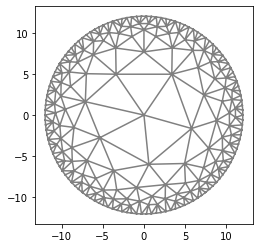

Eigenfrequency:  0.03245 [Hz]


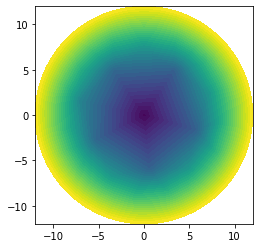

Eigenfrequency:  0.05261 [Hz]


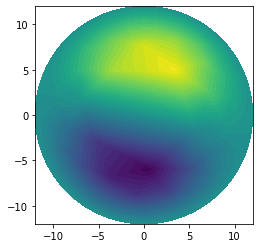

Eigenfrequency:  0.05317 [Hz]


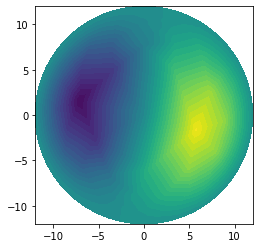

Eigenfrequency:  0.07262 [Hz]


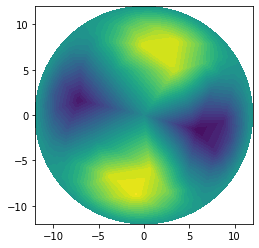

Eigenfrequency:  0.07297 [Hz]


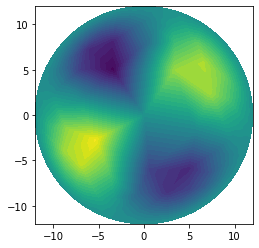

Eigenfrequency:  0.07924 [Hz]


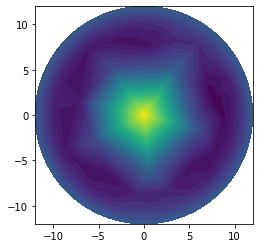

Eigenfrequency:  0.09387 [Hz]


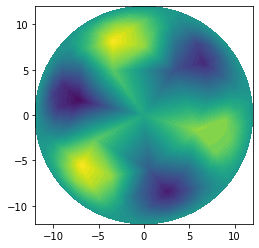

Eigenfrequency:  0.09617 [Hz]


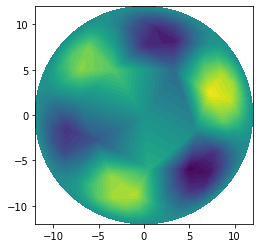

Eigenfrequency:  0.10920 [Hz]


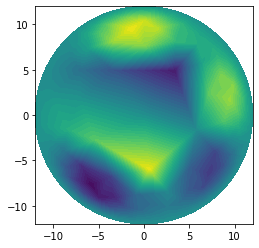

Eigenfrequency:  0.11176 [Hz]


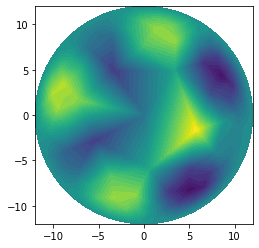

Eigenfrequency:  0.11600 [Hz]


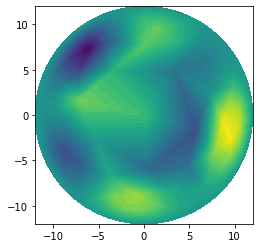

In [39]:
#grab eigenratios for all shapes
circle_eigratios = forward(circle_points, "circle_mesh.png", "circle_mode.xdmf")

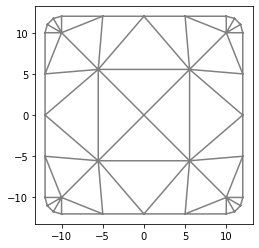

Eigenfrequency:  0.03097 [Hz]


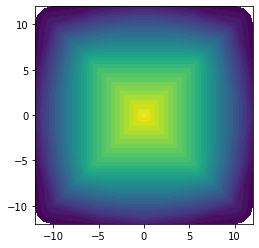

Eigenfrequency:  0.05032 [Hz]


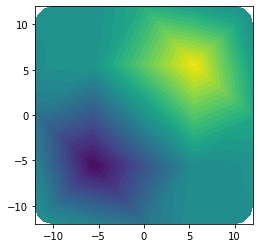

Eigenfrequency:  0.05032 [Hz]


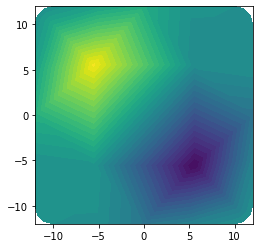

Eigenfrequency:  0.06301 [Hz]


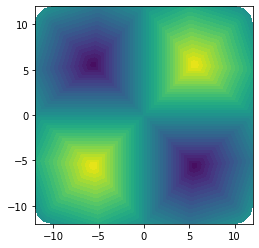

Eigenfrequency:  0.07619 [Hz]


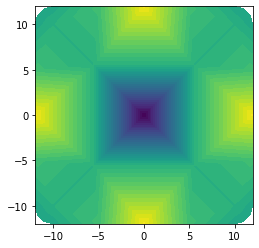

Eigenfrequency:  0.07969 [Hz]


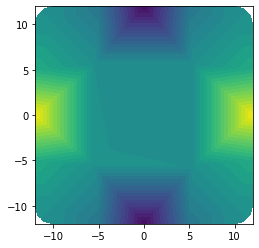

Eigenfrequency:  0.08661 [Hz]


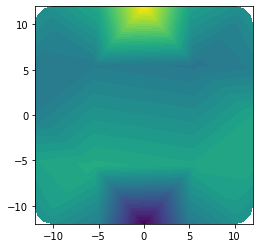

Eigenfrequency:  0.08661 [Hz]


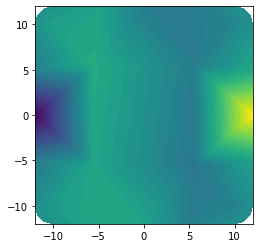

Eigenfrequency:  0.10040 [Hz]


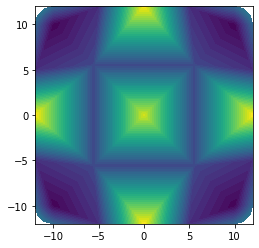

Eigenfrequency:  0.10650 [Hz]


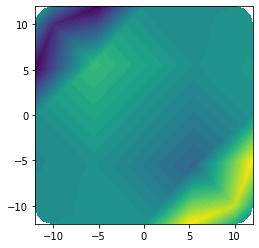

Eigenfrequency:  0.10650 [Hz]


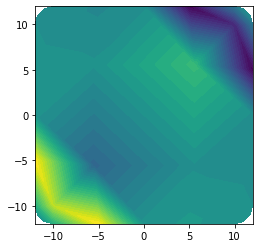

In [40]:
square_eigratios = forward(square_points, "square_mesh.png", "square_mode.xdmf")

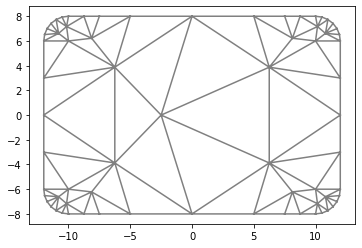

Eigenfrequency:  0.03968 [Hz]


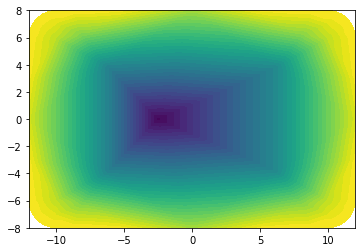

Eigenfrequency:  0.05740 [Hz]


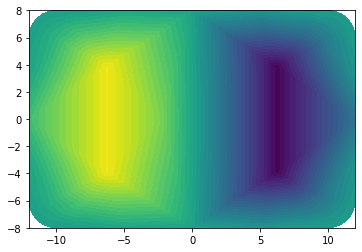

Eigenfrequency:  0.07421 [Hz]


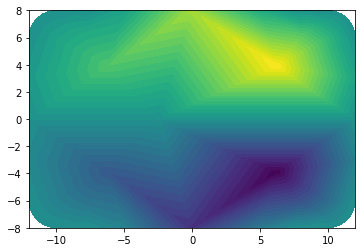

Eigenfrequency:  0.08213 [Hz]


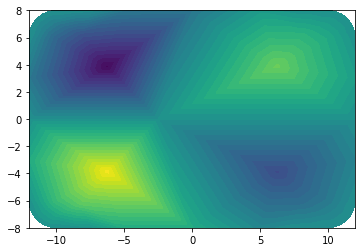

Eigenfrequency:  0.08458 [Hz]


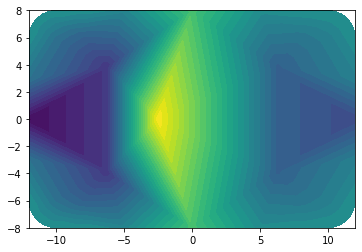

Eigenfrequency:  0.10145 [Hz]


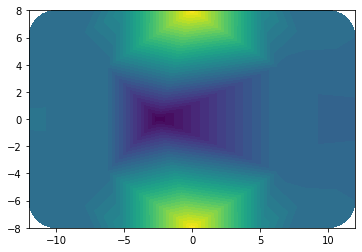

Eigenfrequency:  0.10404 [Hz]


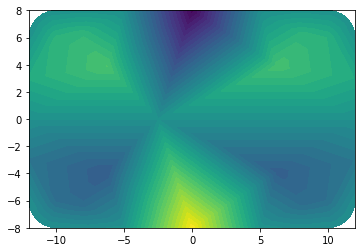

Eigenfrequency:  0.11206 [Hz]


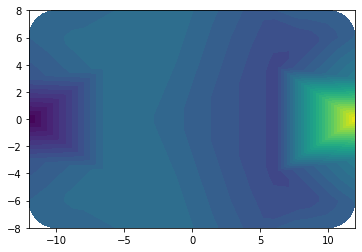

Eigenfrequency:  0.11789 [Hz]


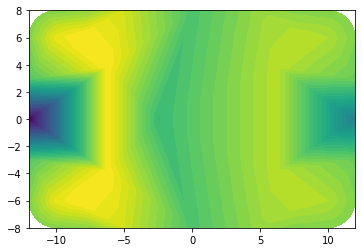

Eigenfrequency:  0.14326 [Hz]


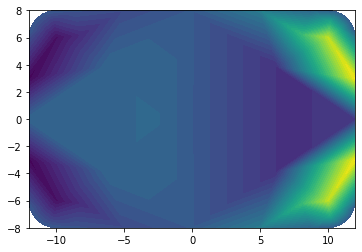

Eigenfrequency:  0.14650 [Hz]


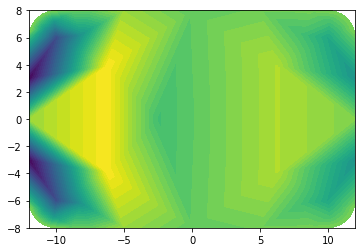

In [41]:
rectangle_eigratios = forward(rectangle_points, "rectangle_mesh.png", "rectangle_mode.xdmf")

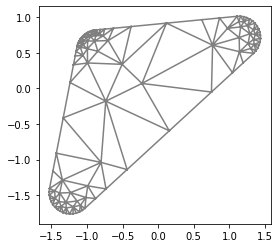

Eigenfrequency:  0.40231 [Hz]


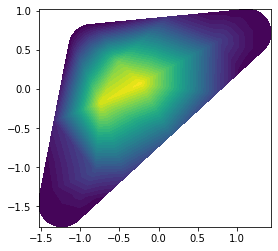

Eigenfrequency:  0.58818 [Hz]


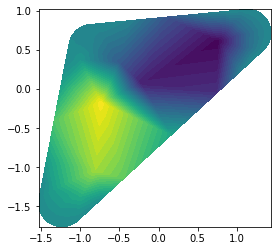

Eigenfrequency:  0.69150 [Hz]


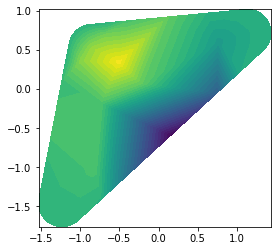

Eigenfrequency:  0.71060 [Hz]


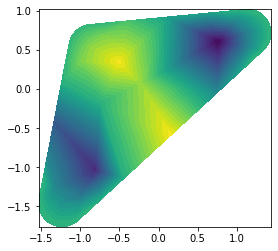

Eigenfrequency:  0.81578 [Hz]


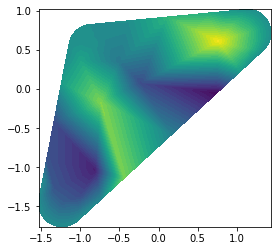

Eigenfrequency:  0.87010 [Hz]


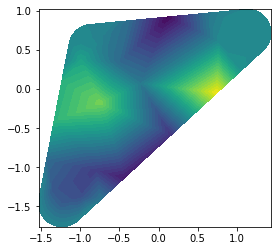

Eigenfrequency:  0.93469 [Hz]


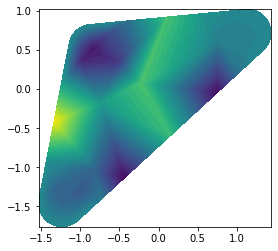

Eigenfrequency:  0.96514 [Hz]


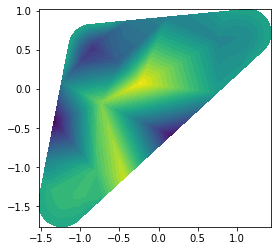

Eigenfrequency:  1.01593 [Hz]


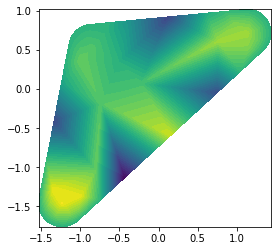

Eigenfrequency:  1.06698 [Hz]


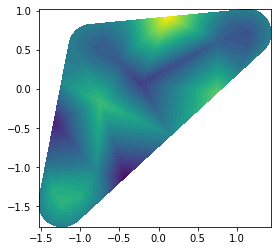

Eigenfrequency:  1.20050 [Hz]


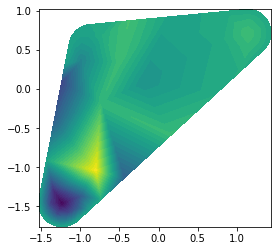

In [42]:
triangle_eigratios = forward(triangle_points, "triangle_mesh.png", "triangle_mode.xdmf")

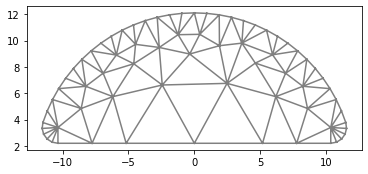

Eigenfrequency:  0.06132 [Hz]


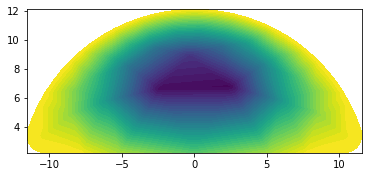

Eigenfrequency:  0.08218 [Hz]


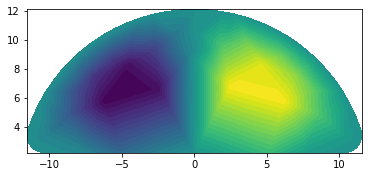

Eigenfrequency:  0.10634 [Hz]


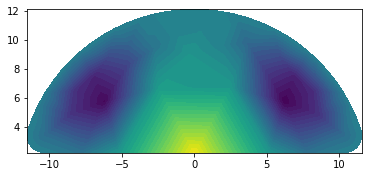

Eigenfrequency:  0.10969 [Hz]


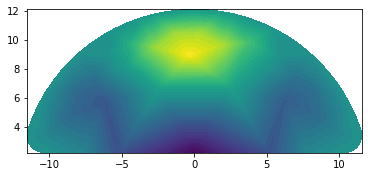

Eigenfrequency:  0.12450 [Hz]


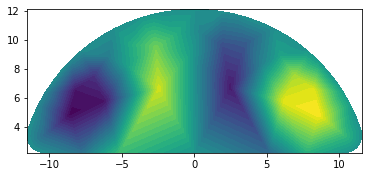

Eigenfrequency:  0.13592 [Hz]


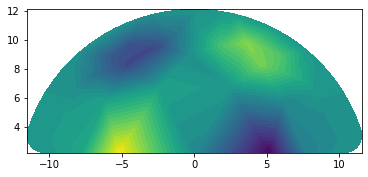

Eigenfrequency:  0.14982 [Hz]


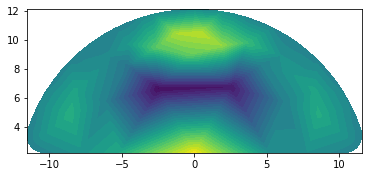

Eigenfrequency:  0.15147 [Hz]


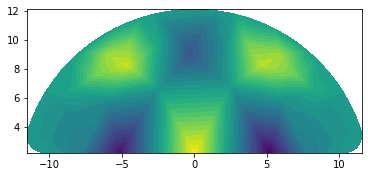

Eigenfrequency:  0.15911 [Hz]


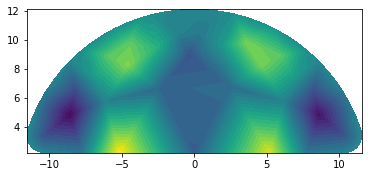

Eigenfrequency:  0.17202 [Hz]


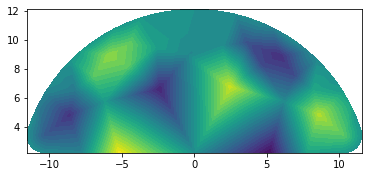

Eigenfrequency:  0.17871 [Hz]


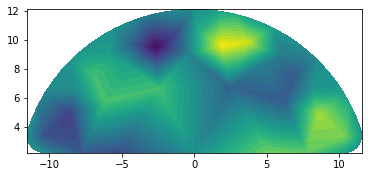

In [43]:
half_circle_eigratios = forward(half_circle_points, "half_circle_mesh.png", "half_circle_mode.xdmf")

In [16]:
#create dictionary of data
eigratio_dict = {"Circle":circle_eigratios, 
"Square":square_eigratios,
"Rectangle":rectangle_eigratios, 
"Triangle":triangle_eigratios, 
"Half Circle":half_circle_eigratios}

#convert dictionary to pandas dataframe
eig_ratio_df = pd.DataFrame.from_dict(eigratio_dict)

#save dataframe to csv
pd.DataFrame.to_csv(eig_ratio_df, "eig_ratios.csv")

## Fast Fourier Transform Analysis

In [20]:
#create function to perform fft on data and find freq peaks
def analyze(filename,h,p,w,d):
    #new figure
    plt.figure()
    
    #import data and perform fft
    samplerate,data = wavfile.read(filename)
    freq = scipy.fft.fft(data)
    
    #calculate unit constant
    N = int(len(freq))
    F = samplerate/N
    
    #convert to Hz and remove duplicate and unnecessary data
    freqHz = freq*F
    freqHz = abs(freqHz[:N//20])
    
    #plot results
    plt.plot(freqHz)
    
    #locate peaks in the fft
    peaks,properties = scipy.signal.find_peaks(freqHz, height=h, prominence=p, width=w, distance=d)
    
    #overlay peak points onto plot and add labels
    plt.scatter(peaks,freqHz[peaks],color='red')
    plt.xlabel('Frequency (f) [Hz]')
    plt.ylabel('Relative Strength [au]')
    
    #export plot
    outfile = filename[:-4]+'.pdf'
    plt.savefig(outfile,dpi=500)
    
    return freqHz, peaks

In [21]:
#calculate eigenvalues as frequency ratios
def audioEigs(peaks):
    eig = []
    for i in range(1,len(peaks)):
        eig.append(peaks[i]/peaks[0])
    return eig

## Results

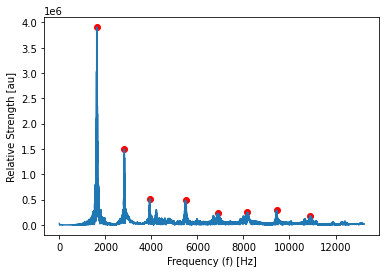

In [24]:
#Call function for each drum shape
freqCircle, peaksCircle = analyze('audio/circle.wav',0.15e6,20,3,300)

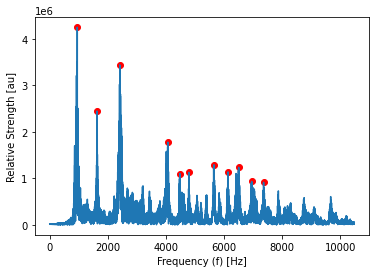

In [25]:
freqSquare, peaksSquare = analyze('audio/square.wav',0.9e6,20,2,300)

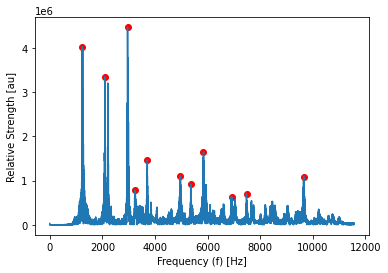

In [26]:
freqRectangle, peaksRectangle = analyze('audio/rectangle.wav',0.6e6,20,2,200)

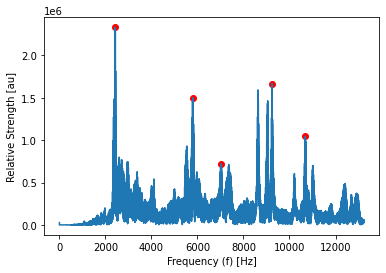

In [27]:
freqTriangle, peaksTriangle = analyze('audio/triangle.wav',0.5e6,20,3,1000)

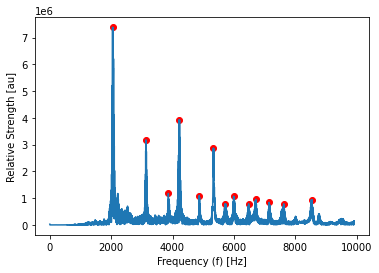

In [28]:
freqSemicircle, peaksSemicircle = analyze('audio/semicircle.wav',0.7e6,700000,2,200)

In [29]:
#call function for each drum shape
eigC = np.array(audioEigs(peaksCircle))
eigSq = np.array(audioEigs(peaksSquare))
eigR = np.array(audioEigs(peaksRectangle))
eigT = np.array(audioEigs(peaksTriangle))
eigSC = np.array(audioEigs(peaksSemicircle))
#print results
print('Circle eigenvalues: \n',eigC)
print('\nSquare eigenvalues: \n',eigSq)
print('\nRectangle eigenvalues: \n',eigR)
print('\nTriangle eigenvalues: \n',eigT)
print('\nSemicircle eigenvalues: \n',eigSC)

Circle eigenvalues: 
 [1.73982737 2.42108508 3.3810111  4.24414303 5.03575832 5.82182491
 6.71824908]

Square eigenvalues: 
 [1.7167019  2.54545455 4.29704017 4.72938689 5.05813953 5.97040169
 6.48414376 6.86997886 7.34249471 7.77589852]

Rectangle eigenvalues: 
 [1.69386107 2.38852989 2.62035541 2.99596123 4.01453958 4.32956381
 4.72132472 5.58319871 6.04281099 7.80210016]

Triangle eigenvalues: 
 [2.39603142 2.90781315 3.81976023 4.41835469]

Semicircle eigenvalues: 
 [1.53225806 1.88905181 2.06304985 2.38123167 2.60654936 2.79521017
 2.92864125 3.16715543 3.28103617 3.49657869 3.72825024 4.1744868 ]


## Method Comparison

In [30]:
eigMesh = np.loadtxt('eig_ratios.csv',skiprows=1,delimiter=',')[:,1:]

In [31]:
#Separate mesh-based eigenvalues into individual shapes
eigCMesh = eigMesh[:len(eigC),0]
eigSMesh = eigMesh[:len(eigSq),1]
eigRMesh = eigMesh[:len(eigR),2]
eigTMesh = eigMesh[:len(eigT),3]
eigSCMesh = eigMesh[:len(eigSC),4]
eigSC = eigSC[:10]

#Compute percent errors
errorC = (eigCMesh-eigC)*100/eigCMesh
errorS = (eigSMesh-eigSq)*100/eigSMesh
errorR = (eigRMesh-eigR)*100/eigRMesh
errorT = (eigTMesh-eigT)*100/eigTMesh
errorSC = (eigSCMesh-eigSC)*100/eigSCMesh

## Error

In [32]:
print('\n\n""""""""""""""""""""""""""""""\n\nErrors for Circle(%): \n',errorC)
print('\nMean error: ',np.mean(abs(errorC)))
print('\nErrors for Square(%): \n',errorS)
print('\nMean error: ',np.mean(abs(errorS)))
print('\nErrors for Rectangle(%): \n',errorR)
print('\nMean error: ',np.mean(abs(errorR)))
print('\nErrors for Triangle(%): \n',errorT)
print('\nMean error: ',np.mean(abs(errorT)))
print('\nErrors for Semicircle(%): \n',errorSC)
print('\nMean error: ',np.mean(abs(errorSC)))



""""""""""""""""""""""""""""""

Errors for Circle(%): 
 [33.82122672  9.85146092 32.51290042 16.0882191  15.56600383 30.44597017
 23.52719676]

Mean error:  23.11613970222133

Errors for Square(%): 
 [34.96505991  3.56888194 -3.83129883 21.84953343 23.59201401 23.6463966
 17.07630962 34.61584785 37.8914958  34.22543091]

Mean error:  23.526226889128157

Errors for Rectangle(%): 
 [19.07120405 31.72020017 38.85541338 34.0782697  38.59643576 37.03331793
 40.81992451 36.76324714 53.65289429 42.77939032]

Mean error:  37.337029725276615

Errors for Triangle(%): 
 [-12.09535923   1.57582759 -22.43568378  -7.45765603]

Mean error:  10.891131657942301

Errors for Semicircle(%): 
 [14.70010363 37.19443834 35.52840294 42.24460888 46.95100231 53.18030359
 52.00674956 52.96118126 58.31323818 58.83939698]

Mean error:  45.19194256774885


## Conclusion

As you can see in the results section, the relative strength range for all drums is the same and, we know peaks in  FFT can represent the natural frequencies of the drums. ​For different frequencies, each of the drums has a differents relative strength. 

For the circle and semi-circle in high frequency, we can see the lowest relative strength. The highest relative strength in high frequency is related to the triangle drum. 

The circular shape gives the drum the lowest pitch or bass sound compared with other shapes. The particular symmetry helps in the tuning of the drum and even the distribution of the tension on the membrane.

The error for the each of the meshes are shown above comparing the two methods. This is the percent error between the PDE method and the FFT. Notice that there is an error between 10% and 45%. Some consideration that cause this error could be sampling the audio sample, noise that is not filtered, and a lack of consideration for the rim of the drum (damping).